<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




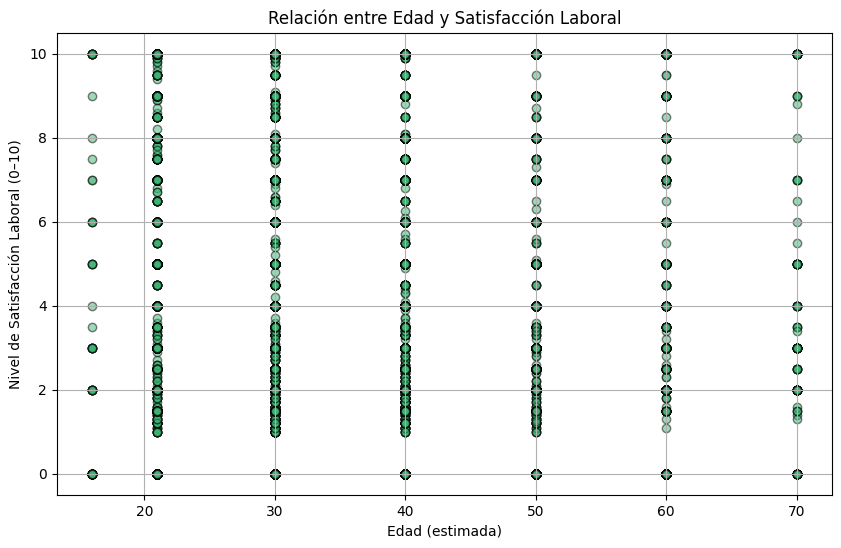

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Eliminar valores nulos
df = df[['Age', 'JobSatPoints_6']].dropna()

# Convertir Age a valores numéricos aproximados
def convertir_edad(valor):
    mapa = {
        'Under 18 years old': 16,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    return mapa.get(valor, None)

df['EdadNum'] = df['Age'].apply(convertir_edad)
df = df.dropna(subset=['EdadNum'])

# Normalizar JobSatPoints_6 si hay valores mayores a 10
df['JobSatNorm'] = df['JobSatPoints_6'].apply(lambda x: x if x <= 10 else x / 10)

# Graficar el scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['EdadNum'], df['JobSatNorm'], alpha=0.5, color='mediumseagreen', edgecolors='black')
plt.title('Relación entre Edad y Satisfacción Laboral')
plt.xlabel('Edad (estimada)')
plt.ylabel('Nivel de Satisfacción Laboral (0–10)')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


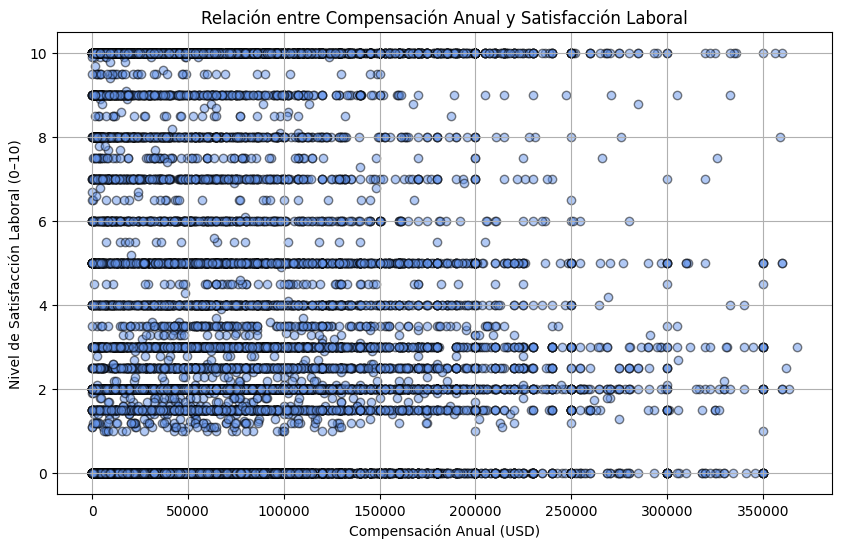

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Eliminar valores nulos
df = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Normalizar JobSatPoints_6 si hay valores mayores a 10
df['JobSatNorm'] = df['JobSatPoints_6'].apply(lambda x: x if x <= 10 else x / 10)

# Filtrar compensaciones extremas para evitar distorsión visual
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Graficar el scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatNorm'], alpha=0.5, color='cornflowerblue', edgecolors='black')
plt.title('Relación entre Compensación Anual y Satisfacción Laboral')
plt.xlabel('Compensación Anual (USD)')
plt.ylabel('Nivel de Satisfacción Laboral (0–10)')
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


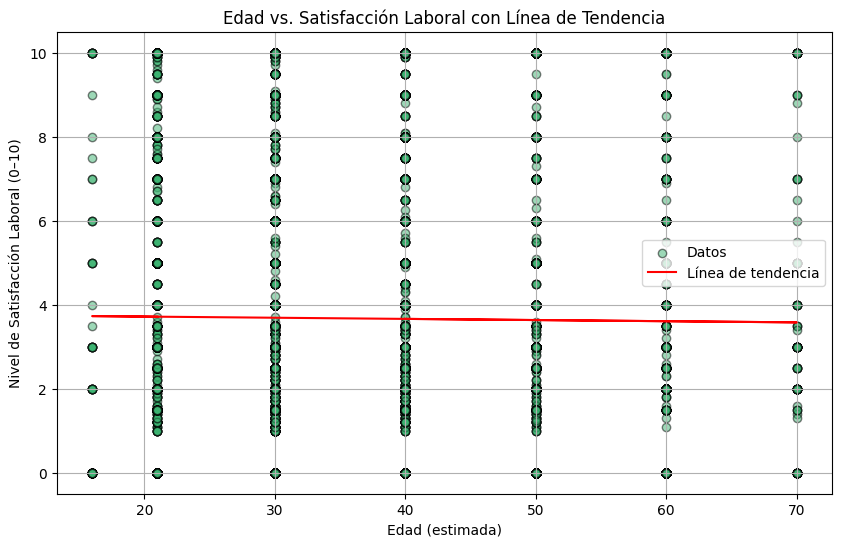

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Eliminar valores nulos
df = df[['Age', 'JobSatPoints_6']].dropna()

# Convertir Age a valores numéricos aproximados
def convertir_edad(valor):
    mapa = {
        'Under 18 years old': 16,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    return mapa.get(valor, None)

df['EdadNum'] = df['Age'].apply(convertir_edad)
df = df.dropna(subset=['EdadNum'])

# Normalizar JobSatPoints_6
df['JobSatNorm'] = df['JobSatPoints_6'].apply(lambda x: x if x <= 10 else x / 10)

# Calcular línea de regresión
x = df['EdadNum']
y = df['JobSatNorm']
m, b = np.polyfit(x, y, 1)  # Ajuste lineal

# Graficar
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5, color='mediumseagreen', edgecolors='black', label='Datos')
plt.plot(x, m*x + b, color='red', label='Línea de tendencia')
plt.title('Edad vs. Satisfacción Laboral con Línea de Tendencia')
plt.xlabel('Edad (estimada)')
plt.ylabel('Nivel de Satisfacción Laboral (0–10)')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


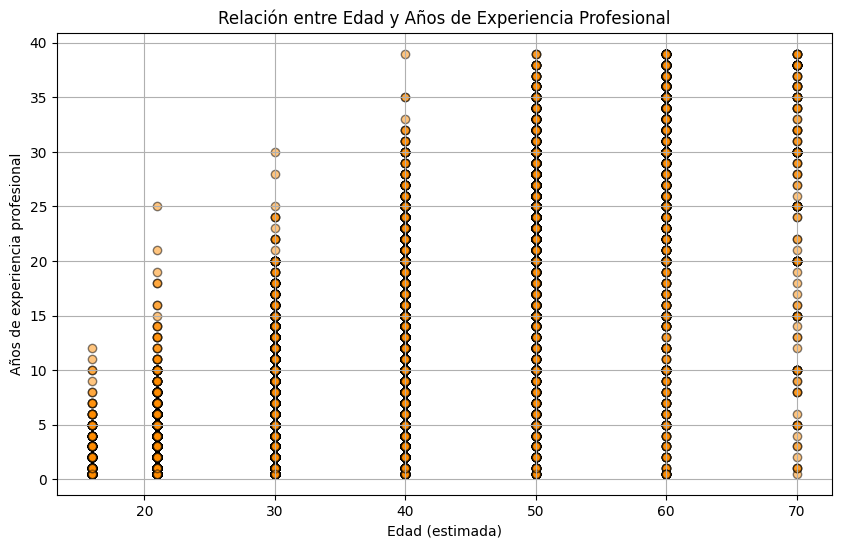

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Eliminar valores nulos
df = df[['Age', 'YearsCodePro']].dropna()

# Convertir Age a valores numéricos aproximados
def convertir_edad(valor):
    mapa = {
        'Under 18 years old': 16,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    return mapa.get(valor, None)

df['EdadNum'] = df['Age'].apply(convertir_edad)

# Convertir YearsCodePro a valores numéricos
def convertir_experiencia(valor):
    if valor == 'Less than 1 year':
        return 0.5
    elif valor == 'More than 50 years':
        return 51
    else:
        try:
            return float(valor)
        except:
            return None

df['ExpNum'] = df['YearsCodePro'].apply(convertir_experiencia)

# Eliminar filas con valores no convertibles
df = df.dropna(subset=['EdadNum', 'ExpNum'])

# Filtrar valores extremos si lo deseas
df = df[df['ExpNum'] < df['ExpNum'].quantile(0.99)]

# Graficar el scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['EdadNum'], df['ExpNum'], alpha=0.5, color='darkorange', edgecolors='black')
plt.title('Relación entre Edad y Años de Experiencia Profesional')
plt.xlabel('Edad (estimada)')
plt.ylabel('Años de experiencia profesional')
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


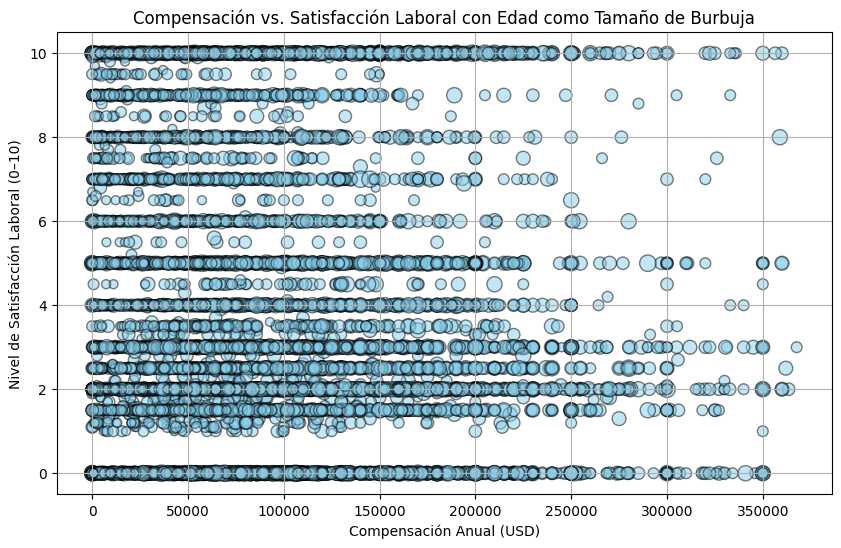

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Eliminar valores nulos
df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()

# Convertir Age a valores numéricos aproximados
def convertir_edad(valor):
    mapa = {
        'Under 18 years old': 16,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    return mapa.get(valor, None)

df['EdadNum'] = df['Age'].apply(convertir_edad)
df = df.dropna(subset=['EdadNum'])

# Normalizar JobSatPoints_6 si hay valores mayores a 10
df['JobSatNorm'] = df['JobSatPoints_6'].apply(lambda x: x if x <= 10 else x / 10)

# Filtrar compensaciones extremas para evitar distorsión visual
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Escalar edad para usar como tamaño de burbuja
df['BubbleSize'] = df['EdadNum'] * 2  # Puedes ajustar el factor si las burbujas son muy grandes o pequeñas

# Graficar el bubble plot
plt.figure(figsize=(10,6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatNorm'],
            s=df['BubbleSize'], alpha=0.5, color='skyblue', edgecolors='black')

plt.title('Compensación vs. Satisfacción Laboral con Edad como Tamaño de Burbuja')
plt.xlabel('Compensación Anual (USD)')
plt.ylabel('Nivel de Satisfacción Laboral (0–10)')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
## Write your code here

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


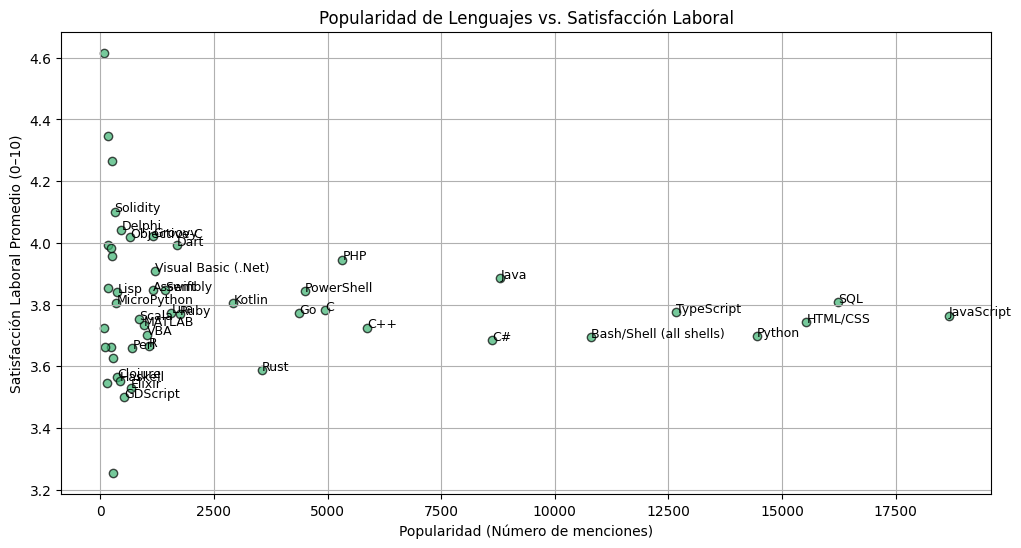

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Eliminar valores nulos
df = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()

# Normalizar JobSatPoints_6 si hay valores mayores a 10
df['JobSatNorm'] = df['JobSatPoints_6'].apply(lambda x: x if x <= 10 else x / 10)

# Separar los lenguajes individuales
df_expanded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Agrupar por lenguaje y calcular estadísticas
language_stats = df_expanded.groupby('Language').agg(
    PromedioSatisfaccion=('JobSatNorm', 'mean'),
    Popularidad=('Language', 'count')
).reset_index()

# Filtrar lenguajes con suficiente popularidad
language_stats = language_stats[language_stats['Popularidad'] > 50]

# Graficar scatter plot
plt.figure(figsize=(12,6))
plt.scatter(language_stats['Popularidad'], language_stats['PromedioSatisfaccion'],
            alpha=0.7, color='mediumseagreen', edgecolors='black')

# Etiquetar algunos lenguajes populares
for i, row in language_stats.iterrows():
    if row['Popularidad'] > 300 or row['PromedioSatisfaccion'] > 8:
        plt.text(row['Popularidad'], row['PromedioSatisfaccion'], row['Language'], fontsize=9)

plt.title('Popularidad de Lenguajes vs. Satisfacción Laboral')
plt.xlabel('Popularidad (Número de menciones)')
plt.ylabel('Satisfacción Laboral Promedio (0–10)')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


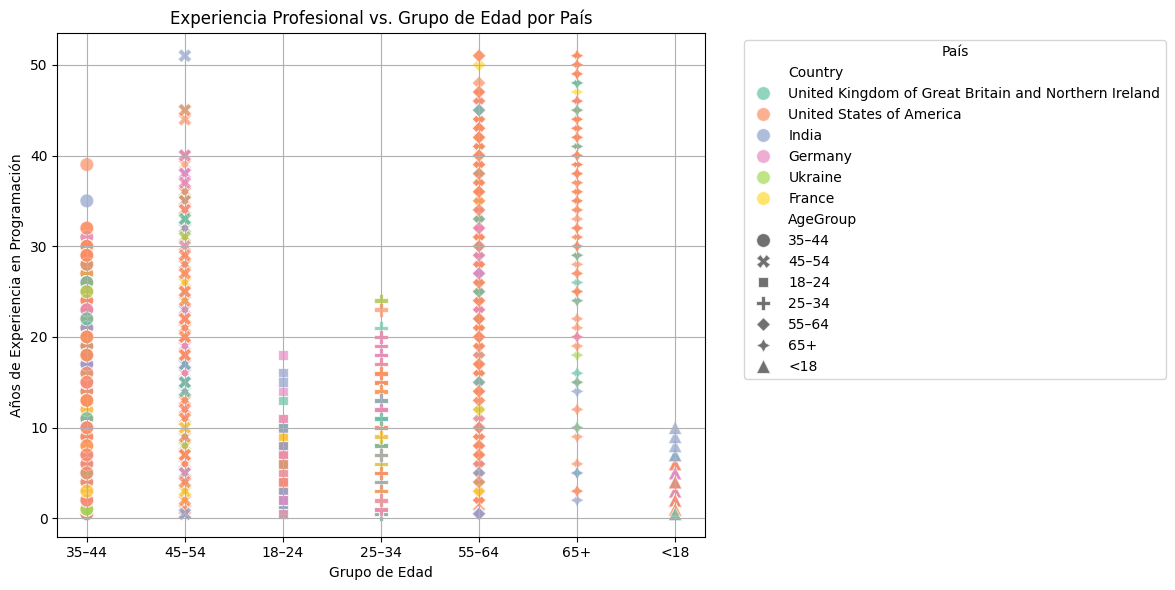

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Filtrar columnas relevantes y eliminar nulos
df = df[['YearsCodePro', 'Age', 'Country']].dropna()

# Convertir YearsCodePro a numérico (algunos valores son 'Less than 1 year', 'More than 50 years')
def convertir_experiencia(valor):
    if valor == 'Less than 1 year':
        return 0.5
    elif valor == 'More than 50 years':
        return 51
    try:
        return float(valor)
    except:
        return None

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convertir_experiencia)
df = df.dropna(subset=['YearsCodeProNum'])

# Convertir grupos de edad a categorías más limpias
edad_mapa = {
    'Under 18 years old': '<18',
    '18-24 years old': '18–24',
    '25-34 years old': '25–34',
    '35-44 years old': '35–44',
    '45-54 years old': '45–54',
    '55-64 years old': '55–64',
    '65 years or older': '65+'
}
df['AgeGroup'] = df['Age'].map(edad_mapa)
df = df.dropna(subset=['AgeGroup'])

# Filtrar países con suficientes respuestas
top_paises = df['Country'].value_counts().nlargest(6).index
df_filtrado = df[df['Country'].isin(top_paises)]

# Crear el scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filtrado,
                x='AgeGroup',
                y='YearsCodeProNum',
                hue='Country',
                style='AgeGroup',
                palette='Set2',
                s=100,
                alpha=0.7)

plt.title('Experiencia Profesional vs. Grupo de Edad por País')
plt.xlabel('Grupo de Edad')
plt.ylabel('Años de Experiencia en Programación')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
!pip install seaborn


In [14]:
import seaborn as sns


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
